In [1]:
import os, glob
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

<h1/>Business Understanding

<h4/>Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app (quoted from Wikipedia)
The plaform collects data about hosts, listings and bookings and makes some big cities data available at http://insideairbnb.com/get-the-data/ (free for the previous year, and past years for a price)

<h1/>Data Understanding

In [2]:
#parameters setup
local_folder='C:\\Users\\quynhvt5\\Documents\\airbnb\\'

<h3/>listings.csv investigation

In [3]:
#listings rows and columns
listings_df = pd.read_csv(local_folder+'Boston_listings.csv', header=0)
print(listings_df.shape)
listings_df.columns

(3462, 74)


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

<h4/>there are 3462 listings and 74 properties of each listings, few seem useful to our project so I will filter them out later

In [4]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.462000e+03,3.462000e+03,3.462000e+03,3462.000000,3462.000000,0.0,3462.000000,3462.000000,3462.000000,0.0,...,2521.000000,2519.000000,2521.000000,2519.000000,2519.000000,3462.000000,3462.000000,3462.000000,3462.000000,2531.000000
mean,3.015745e+16,2.022032e+13,1.322723e+08,247.021086,247.021086,NaN,42.338999,-71.082871,3.205373,NaN,...,4.707184,4.838841,4.813804,4.763049,4.625216,27.742923,23.515598,4.150780,0.026574,1.582687
std,1.273377e+17,0.000000e+00,1.361320e+08,665.094262,665.094262,NaN,0.026537,0.032779,2.165700,NaN,...,0.451507,0.347496,0.393341,0.349961,0.437021,47.274944,46.607023,11.918985,0.246064,1.925106
min,3.781000e+03,2.022032e+13,4.804000e+03,0.000000,0.000000,NaN,42.235300,-71.179910,0.000000,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.926319e+07,2.022032e+13,1.820209e+07,2.000000,2.000000,NaN,42.324680,-71.103210,2.000000,NaN,...,4.630000,4.830000,4.800000,4.670000,4.500000,1.000000,1.000000,0.000000,0.000000,0.260000
50%,3.935217e+07,2.022032e+13,8.698908e+07,7.000000,7.000000,NaN,42.344810,-71.075275,2.000000,NaN,...,4.840000,4.950000,4.940000,4.880000,4.730000,6.000000,2.000000,0.000000,0.000000,0.920000
75%,4.960181e+07,2.022032e+13,2.278891e+08,48.000000,48.000000,NaN,42.355285,-71.061802,4.000000,NaN,...,4.990000,5.000000,5.000000,5.000000,4.880000,32.000000,25.000000,3.000000,0.000000,2.265000
max,5.856061e+17,2.022032e+13,4.490927e+08,2564.000000,2564.000000,NaN,42.396300,-70.969510,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,191.000000,191.000000,68.000000,4.000000,20.430000


<h4/>some cells are filled with NaN, so it is something to be aware of later when I start the data processing and analysis

In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20220320051201,2022-03-20,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,4.95,4.86,4.91,NaN,f,1,1,0,0,0.27
1,5506,https://www.airbnb.com/rooms/5506,20220320051201,2022-03-20,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,...,4.89,4.54,4.78,Approved by the government,f,10,10,0,0,0.70
2,6695,https://www.airbnb.com/rooms/6695,20220320051201,2022-03-20,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,...,4.95,4.48,4.70,STR446650,f,10,10,0,0,0.75
3,8789,https://www.airbnb.com/rooms/8789,20220320051201,2022-03-20,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/32210/7fdd2fd...,26988,https://www.airbnb.com/users/show/26988,...,4.96,4.96,4.56,NaN,f,7,7,0,0,0.27
4,10730,https://www.airbnb.com/rooms/10730,20220320051201,2022-03-20,Bright 1bed facing Golden Dome,"Bright, spacious 1 bed on the 9th floor facing...",Beacon Hill is located downtown and is conveni...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,...,4.92,4.96,4.46,NaN,f,7,7,0,0,0.22


<h3/>calendar.csv investigation

In [6]:
calendar_df = pd.read_csv(local_folder+'Boston_calendar.csv', header=0)
print(calendar_df.shape)
calendar_df.columns

(1262901, 7)


Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

<h4/>There are 1262901 bookings and 7 properties for each booking. The problem with this file when mass processing is the sheer size, so it is better to process and filter out unnecessary data to save the disk space.

In [7]:
calendar_df.describe()

,listing_id,minimum_nights,maximum_nights
count,1.262901e+06,1.262896e+06,1.262896e+06
mean,3.017530e+16,7.130846e+01,4.653299e+06
std,1.273549e+17,1.614713e+02,9.984657e+07
min,3.781000e+03,1.000000e+00,1.000000e+00
25%,1.924817e+07,2.000000e+00,3.650000e+02
50%,3.935215e+07,2.900000e+01,1.125000e+03
75%,4.963828e+07,9.100000e+01,1.125000e+03
max,5.856061e+17,7.300000e+02,2.147484e+09


In [8]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13655518,2022-03-20,f,$180.00,$180.00,2.0,1125.0
1,13655518,2022-03-21,f,$180.00,$180.00,2.0,1125.0
2,13655518,2022-03-22,f,$180.00,$180.00,2.0,1125.0
3,13655518,2022-03-23,f,$180.00,$180.00,2.0,1125.0
4,13655518,2022-03-24,f,$180.00,$180.00,2.0,1125.0


<h3/>reviews.csv investigation

In [9]:
reviews_df = pd.read_csv(local_folder+'Boston_reviews.csv', header=0)
print(reviews_df.shape)
reviews_df.columns

(141499, 6)


Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

<h4/>There are 141499 comments, and each has 6 properties. Unless the project does some NLP to extract, for examples, sentiments for analysis, these data are useless to us.

In [10]:
reviews_df.describe()

,listing_id,id,reviewer_id
count,1.414990e+05,1.414990e+05,1.414990e+05
mean,2.601350e+14,9.382698e+16,1.165417e+08
std,1.204423e+16,1.916535e+17,1.094354e+08
min,3.781000e+03,1.021000e+03,3.000000e+00
25%,6.609546e+06,2.125757e+08,2.861429e+07
50%,1.649684e+07,4.519938e+08,8.037431e+07
75%,2.750340e+07,7.200669e+08,1.762927e+08
max,5.831602e+17,5.869773e+17,4.501171e+08


In [11]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


<h3/>listings.csv (summary version) investigation

In [12]:
summary_listings_df = pd.read_csv(local_folder+'Boston_summary_listings.csv', header=0)
print(summary_listings_df.shape)
summary_listings_df.columns

(3462, 18)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

<h4/>This is the summarized version of the detailed listing investigated above. I.e. this is the smaller version with fewer columns. Since it does not have all the columns that the project needs, and the detailed listing is not that big to be a problem, I am going to ignore it.

In [13]:
summary_listings_df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.462000e+03,3.462000e+03,0.0,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,2531.000000,3462.000000,3462.000000,3462.000000
mean,3.015745e+16,1.322723e+08,NaN,42.338999,-71.082871,197.001155,34.228481,40.872039,1.582687,27.742923,184.853553,9.536973
std,1.273377e+17,1.361320e+08,NaN,0.026537,0.032779,280.043080,41.573919,79.716509,1.925106,47.274944,132.986039,20.138474
min,3.781000e+03,4.804000e+03,NaN,42.235300,-71.179910,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.926319e+07,1.820209e+07,NaN,42.324680,-71.103210,90.000000,2.000000,0.000000,0.260000,1.000000,56.000000,0.000000
50%,3.935217e+07,8.698908e+07,NaN,42.344810,-71.075275,150.000000,29.000000,7.000000,0.920000,6.000000,189.500000,1.000000
75%,4.960181e+07,2.278891e+08,NaN,42.355285,-71.061802,238.000000,60.000000,43.000000,2.265000,32.000000,319.000000,9.000000
max,5.856061e+17,4.490927e+08,NaN,42.396300,-70.969510,10000.000000,600.000000,1038.000000,20.430000,191.000000,365.000000,285.000000


In [14]:
summary_listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,132,32,22,2022-01-30,0.27,1,48,3,NaN
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,149,3,110,2021-10-25,0.70,10,12,3,Approved by the government
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,250,3,116,2021-10-12,0.75,10,105,1,STR446650
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Beacon Hill,42.35867,-71.06307,Entire home/apt,110,91,25,2020-04-15,0.27,7,267,0,NaN
4,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35906,-71.06271,Entire home/apt,100,91,33,2021-12-16,0.22,7,223,1,NaN


<h3/>reviews.csv (summary version) investigation

In [15]:
summary_reviews_df = pd.read_csv(local_folder+'Boston_summary_reviews.csv', header=0)
print(summary_reviews_df.shape)
summary_reviews_df.columns

(141499, 2)


Index(['listing_id', 'date'], dtype='object')

<h4/>These data are totally useless

In [16]:
summary_reviews_df.describe()

,listing_id
count,1.414990e+05
mean,2.601350e+14
std,1.204423e+16
min,3.781000e+03
25%,6.609546e+06
50%,1.649684e+07
75%,2.750340e+07
max,5.831602e+17


In [17]:
summary_reviews_df.head()

,listing_id,date
0,3781,2015-07-10
1,3781,2015-08-09
2,3781,2015-09-01
3,3781,2015-09-30
4,3781,2015-10-30


<h3/>neighbourhoods.csv investigation

In [18]:
neighbourhoods_df = pd.read_csv(local_folder+'Boston_neighbourhoods.csv', header=0)
print(neighbourhoods_df.shape)
neighbourhoods_df.columns

(26, 2)


Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

<h4/>These data are totally useless

In [19]:
neighbourhoods_df.describe()

,neighbourhood_group
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [20]:
neighbourhoods_df.head()

,neighbourhood_group,neighbourhood
0,NaN,Allston
1,NaN,Back Bay
2,NaN,Bay Village
3,NaN,Beacon Hill
4,NaN,Brighton


<h3/>neighbourhoods.geojson investigation

In [21]:
neighbourhoods_gdf = gpd.read_file(local_folder+'Boston_neighbourhoods.geojson')
print(neighbourhoods_gdf.shape)
neighbourhoods_gdf.head()

(26, 3)


C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,neighbourhood,neighbourhood_group,geometry
0,Roslindale,None,"MULTIPOLYGON (((-71.12593 42.27200, -71.12575 ..."
1,Jamaica Plain,None,"MULTIPOLYGON (((-71.10499 42.32609, -71.10488 ..."
2,Mission Hill,None,"MULTIPOLYGON (((-71.09043 42.33576, -71.09275 ..."
3,Longwood Medical Area,None,"MULTIPOLYGON (((-71.09811 42.33672, -71.09892 ..."
4,Bay Village,None,"MULTIPOLYGON (((-71.06663 42.34877, -71.06739 ..."


<h4/>The geojson data are much helpful for visualization. By plotting all of them, we can see how much coverage the Airbnb data gave us.
<h4/>Below is the sample plot of Boston.

C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

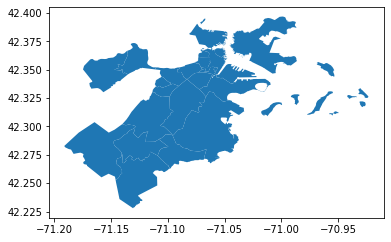

In [22]:
neighbourhoods_gdf.plot()

<h4/>The map looks accurate. I can see the Charles River that flows through the city.
<h4/>Now let's take a look at the coverage of Airbnb data over the globe.

C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\quynhvt5\AppData\Roaming\Python\Pytho

<AxesSubplot:>

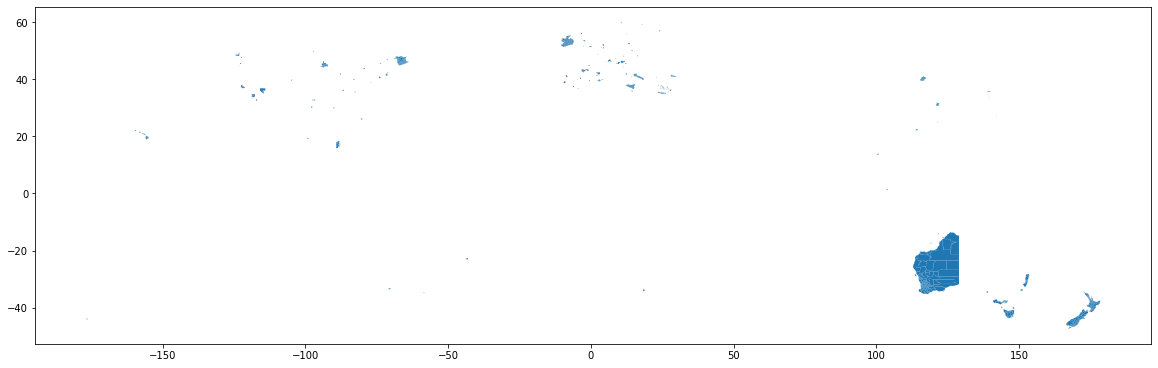

In [25]:
#read in all geojson files
neighbourhoods_geojsons=glob.glob(os.path.join(local_folder, '*.geojson'))
neighbourhoods_gdf=pd.concat([gpd.read_file(neighbourhoods_geojson) for neighbourhoods_geojson in neighbourhoods_geojsons], axis=0, ignore_index=True)
neighbourhoods_gdf.plot(figsize=(20, 10))

<h4/>It looks like it does not cover much of the global map, except for a big chunk that looks like Western Australia. Let's take a closer look.

C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\quynhvt5\AppData\Roaming\Python\Python310\site-packages\descartes\patch.py:64: ShapelyDeprecationWarn

(160, 3)


<AxesSubplot:>

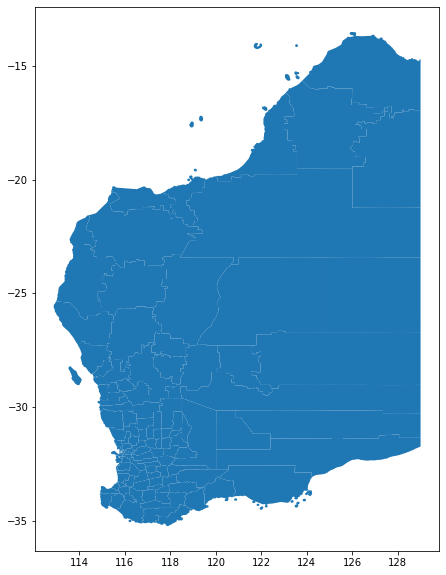

In [26]:
neighbourhoods_gdf = gpd.read_file(local_folder+'western-australia_neighbourhoods.geojson')
print(neighbourhoods_gdf.shape)
neighbourhoods_gdf.plot(figsize=(20, 10))

<h4/>Yes, it is exactly Western Australia, which means that our previous map is correct, and the Airbnb data does not cover much of the globe as we expected.
<h4/>The rest of the CRISP-DM will be discussed inside individual files for each question.